In [1]:
import tensorflow as tf
import numpy as np


In [2]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *

In [43]:
x = np.random.rand(1000, 2)

In [44]:
r = 0.4
a = 0.5
b = 0.6

In [45]:
y = []
for x1, x2 in x:
  if (x1-a)*(x1-a) + (x2-b)*(x2-b) < r*r:
    y.append(1)
  else:
    y.append(0)
y = np.array(y)

In [46]:
import matplotlib.pyplot as plt


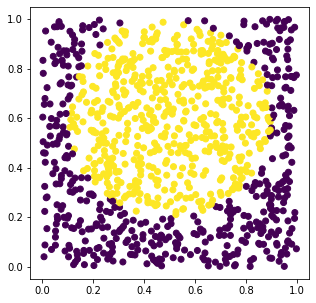

In [47]:
f = plt.figure(figsize=(5, 5))
plt.scatter(x[:, 0], x[:, 1], c=y)
f.show()

In [10]:
i = Input(shape=(2, ))
t = Dense(100, activation='sigmoid')(i)
o = Dense(1, activation='sigmoid')(t)
model = Model(i, o) 
model.summary()

Model: "functional_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               300       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile('Adam', loss='binary_crossentropy', metrics='accuracy')


In [ ]:
model.fit(x, y, epochs=500, validation_split=0.3, verbose=1, shuffle=True)

In [26]:
y_pred = model.predict(x)
y_pred = np.where(y_pred>0.5, 1, 0)

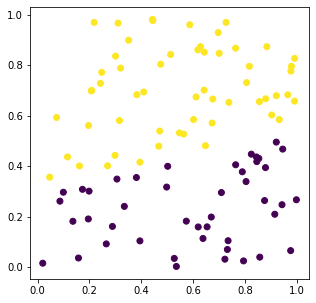

In [27]:
f1 = plt.figure(figsize=(5, 5))
plt.scatter(x[:, 0], x[:, 1], c=y_pred)
f1.show()

In [28]:
i = Input(shape=(2, ))
h1 = Dense(100, activation='sigmoid')(i)
h2 = Dense(100, activation='sigmoid')(h1)
o = Dense(1, activation='sigmoid')(h2)
model_2hidden_layers = Model(i, o) 
model_2hidden_layers.summary()

Model: "functional_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               300       
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 10,501
Trainable params: 10,501
Non-trainable params: 0
_________________________________________________________________


In [29]:
model_2hidden_layers.compile('Adam', loss='binary_crossentropy', metrics='accuracy')


In [ ]:
model_2hidden_layers.fit(x, y, epochs=500, validation_split=0.3, verbose=1, shuffle=True)

In [31]:
y_pred = model_2hidden_layers.predict(x)
y_pred = np.where(y_pred>0.5, 1, 0)

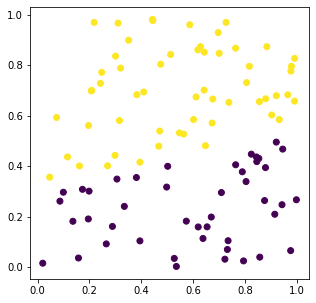

In [32]:
f1 = plt.figure(figsize=(5, 5))
plt.scatter(x[:, 0], x[:, 1], c=y_pred)
f1.show()

In [48]:
x_new = []
for x1, x2 in x:
  x12 = x1*x1
  x22 = x2*x2
  x_new.append([x1, x2, x12, x22])
x_new = np.array(x_new)

In [68]:
i = Input(shape=(4, ))
t = Dense(100, activation='sigmoid')(i)
o = Dense(1, activation='sigmoid')(t)
model_with_new_fearure = Model(i, o) 
model_with_new_fearure.summary()

Model: "functional_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_17 (Dense)             (None, 100)               500       
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 101       
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________


In [69]:
model_with_new_fearure.compile('sgd', loss='mse', metrics='accuracy')

In [ ]:
model_with_new_fearure.fit(x_new, y, epochs=300, validation_split=0.3, verbose=1, shuffle=True)

In [75]:
y_pred = model_with_new_fearure.predict(x_new)
y_pred = np.where(y_pred>0.5, 1, 0)

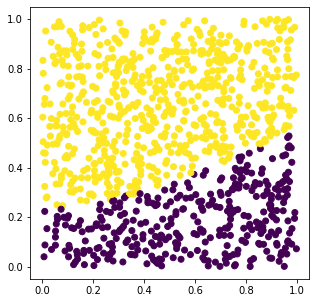

In [76]:
f1 = plt.figure(figsize=(5, 5))
plt.scatter(x[:, 0], x[:, 1], c=y_pred)
f1.show()

In [82]:
i = Input(shape=(4, ))
t = Dense(100, activation='sigmoid')(i)
o = Dense(1, activation='sigmoid')(t)
model_with_new_fearure_new_optimizer = Model(i, o) 
model_with_new_fearure_new_optimizer.summary()

Model: "functional_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 4)]               0         
_________________________________________________________________
dense_19 (Dense)             (None, 100)               500       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 101       
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________


In [83]:
model_with_new_fearure_new_optimizer.compile('adam', loss='mse', metrics='accuracy')

In [84]:
history = model_with_new_fearure_new_optimizer.fit(x_new, y, epochs=300, validation_split=0.3, verbose=1, shuffle=True)

Epoch 1/300
22/22 [==============================] - 0s 6ms/step - loss: 0.2724 - accuracy: 0.5300 - val_loss: 0.2463 - val_accuracy: 0.5500
Epoch 2/300
22/22 [==============================] - 0s 2ms/step - loss: 0.2473 - accuracy: 0.5986 - val_loss: 0.2455 - val_accuracy: 0.6700
Epoch 3/300
22/22 [==============================] - 0s 2ms/step - loss: 0.2444 - accuracy: 0.5800 - val_loss: 0.2422 - val_accuracy: 0.5500
Epoch 4/300
22/22 [==============================] - 0s 2ms/step - loss: 0.2421 - accuracy: 0.5343 - val_loss: 0.2404 - val_accuracy: 0.6133
Epoch 5/300
22/22 [==============================] - 0s 2ms/step - loss: 0.2394 - accuracy: 0.6486 - val_loss: 0.2390 - val_accuracy: 0.7433
Epoch 6/300
22/22 [==============================] - 0s 2ms/step - loss: 0.2383 - accuracy: 0.6414 - val_loss: 0.2367 - val_accuracy: 0.5967
Epoch 7/300
22/22 [==============================] - 0s 2ms/step - loss: 0.2366 - accuracy: 0.6729 - val_loss: 0.2358 - val_accuracy: 0.7000
Epoch 8/300
2

In [78]:
y_pred = model_with_new_fearure_new_optimizer.predict(x_new)
y_pred = np.where(y_pred>0.5, 1, 0)

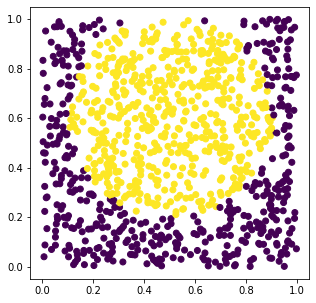

In [79]:
f1 = plt.figure(figsize=(5, 5))
plt.scatter(x[:, 0], x[:, 1], c=y_pred)
f1.show()

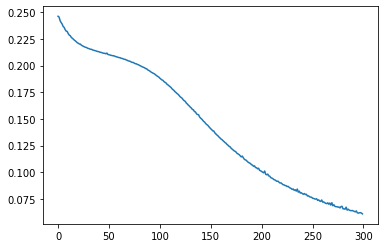

In [87]:
plt.plot(list(range(300)), history.history['val_loss'])
plt.show()